In [34]:
import requests
from selenium import webdriver
import datetime
import time

import numpy as np
import pandas as pd

In [59]:
import matplotlib.pyplot as plt

In [3]:
# create a request url from JFK to Hong Kong, roundtrip
def create_request_url(start_date, end_date):
    base_url = 'https://www.expedia.com/Flights-Search?'
    flight_dates = 'flighttype=on&starDate={}%2F{}%2F{}&endDate={}%2F{}%2F{}&mode=search&trip=roundtrip'.format(*start_date,*end_date)
    leg1 = '&leg1=from%3ANew+York%2C+NY+%28JFKJohn+F.+Kennedy+Intl.%29%2Cto%3AHong+Kong%2C+Hong+Kong+SAR+%28HKG-Hong+Kong+Intl.%29%2Cdeparture%3A{}%2F{}%2F{}TANYT'.format(*start_date)
    leg2 = '&leg2=from%3AHong+Kong%2C+Hong+Kong+SAR+%28HKG-Hong+Kong+Intl.%29%2Cto%3ANew+York%2C+NY+%28JFK-John+F.+Kennedy+Intl.%29%2Cdeparture%3A{}%2F{}%2F{}TANYT'.format(*end_date)
    passenger_options = '&passengers=children%3A0%2Cadults%3A1%2Cseniors%3A0%2Cinfantinlap%3AY'
    request_url = base_url + flight_dates + leg1 + leg2 + passenger_options
    return request_url

In [5]:
start_date = ('04', '01', '2019')
end_date = ('04', '08', '2019')

url = create_request_url(start_date, end_date)
browser.get(url)
lowest_price_str = browser.find_element_by_css_selector('[data-test-id="listing-price-dollars"]').text

In [9]:
lowest_price = int(lowest_price_str.split('$')[-1])

In [10]:
lowest_price

567

In [23]:
def date2tuple(datetime_obj):
    return datetime_obj.strftime("%m/%d/%Y").split('/')

def gen_daterange(start_day, days):
    return [start_day + datetime.timedelta(days=i) for i in days]

def add_week(start_date):
    """ start_date is datetime object"""
    end_date = start_date + datetime.timedelta(days=7)
    return end_date

In [98]:
# start up a Firefox session
browser = webdriver.Firefox()

In [99]:
# from March 1, 2019
start_dt = datetime.date(year=2019, month=2, day=1)
advance_search_days = 200
search_range = gen_daterange(start_dt, days=range(advance_search_days))

# collect info in a DataFrame
min_prices = []
for search_date in search_range:
    vacation_start = search_date
    vacation_end = add_week(vacation_start)
    
    url = create_request_url(date2tuple(vacation_start), date2tuple(vacation_end))
    browser.get(url)
    time.sleep(15)
    try:
        price_elements = browser.find_elements_by_css_selector('[data-test-id="listing-price-dollars"]')
        price_strings = [item.text for item in price_elements]
        prices = np.asarray([int(string.replace(',', '').replace('$', '')) for string in price_strings])
        min_prices.append(np.min(prices))
    except:
        min_prices.append(np.nan)
    
    print(vacation_start, 'flight price: {}'.format(min_prices[-1]))

2019-02-01 flight price: 867
2019-02-02 flight price: 901
2019-02-03 flight price: 787
2019-02-04 flight price: 660
2019-02-05 flight price: 660
2019-02-06 flight price: 740
2019-02-07 flight price: 740
2019-02-08 flight price: 797
2019-02-09 flight price: 1126
2019-02-10 flight price: 781
2019-02-11 flight price: 930
2019-02-12 flight price: 674
2019-02-13 flight price: 740
2019-02-14 flight price: 740
2019-02-15 flight price: 1002
2019-02-16 flight price: 1096
2019-02-17 flight price: 873
2019-02-18 flight price: 860
2019-02-19 flight price: 640
2019-02-20 flight price: 740
2019-02-21 flight price: 665
2019-02-22 flight price: 730
2019-02-23 flight price: 740
2019-02-24 flight price: 740
2019-02-25 flight price: 640
2019-02-26 flight price: 567
2019-02-27 flight price: 640
2019-02-28 flight price: 520
2019-03-01 flight price: 796
2019-03-02 flight price: 828
2019-03-03 flight price: 740
2019-03-04 flight price: 637
2019-03-05 flight price: 637
2019-03-06 flight price: 637
2019-03-07 

In [104]:
timeseries = pd.Series(min_prices, search_range)

In [105]:
import seaborn as sns

In [106]:
sns.set()

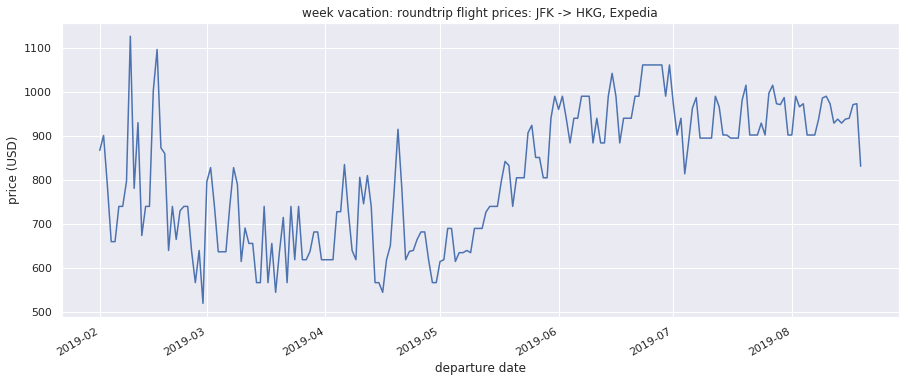

In [107]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(timeseries)

# rotate and align tick labels so they look better
fig.autofmt_xdate()
ax.set_xlabel('departure date')
ax.set_ylabel('price (USD)')
ax.set_title('week vacation: roundtrip flight prices: JFK -> HKG, Expedia')
plt.savefig('prices.png', bbox_inches='tight')
plt.show()